# Multi-Agent Music Store Demo

This notebook demonstrates the multi-agent customer support system for a digital music store. The agent can:
- Answer questions about the music catalog (artists, albums, songs, genres)
- Retrieve invoice and purchase history information
- Remember user preferences across conversations


## Setup


In [1]:
from dotenv import load_dotenv
load_dotenv()

from uuid import uuid4
from langchain.messages import HumanMessage
from langgraph.types import Command

# Import the compiled multi-agent graph
from agents.agent import graph

Seeded 50 concerts to Redis
17:14:42 langgraph.checkpoint.redis INFO   Redis client is a standalone client
17:14:42 langgraph.store.redis INFO   Redis standalone client detected for RedisStore.


## Visualize the Graph


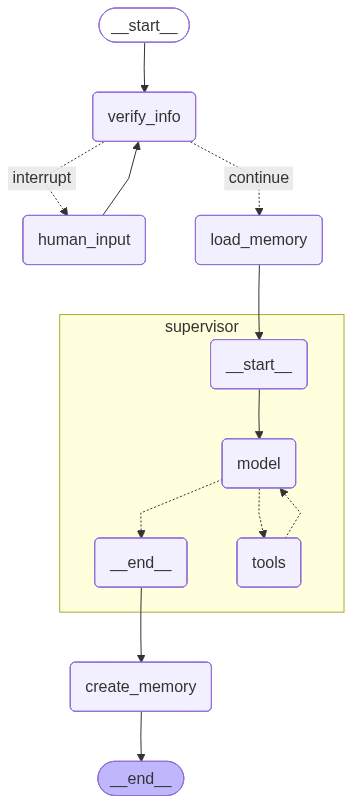

In [2]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

## Demo 1: Music Catalog Query

Ask about albums by an artist. Note: The system will first ask for account verification.


In [3]:
# Create a new thread for this conversation
thread_id = str(uuid4())
config = {"configurable": {"thread_id": thread_id}}

# Initial query - system will ask for verification
result = graph.invoke(
    {"messages": [HumanMessage(content="What albums do you have by The Rolling Stones?")]},
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()


17:14:55 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:00 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
================================ Human Message =================================

What albums do you have by The Rolling Stones?
================================== Ai Message ==================================

I'd be happy to help you with that! Before I can provide information about our available albums by The Rolling Stones, could you please provide your customer ID, email address, or phone number to verify your account? Thank you!


In [4]:
# Provide account info and resume
result = graph.invoke(
    Command(resume="My customer ID is 10"),
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()

17:15:00 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[Memory] No saved preferences for user 10
17:15:01 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
music catalog subagent input: List all available albums by The Rolling Stones for customer ID 10.
17:15:02 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:03 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:05 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:06 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[Memory] Saving preferences for user 10:
  music_preferences: []
  preferred_location: None
  max_concert_budget: None
================================ Human Message =================================

What albums do you have by The Rolling Stones?


## Demo 2: Invoice Query

Ask about purchase history (using same thread - already verified).


In [5]:
# Follow-up question in same thread (no re-verification needed)
result = graph.invoke(
    {"messages": [HumanMessage(content="What was my most recent invoice?")]},
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()


[Memory] Loaded preferences for user 10:
  
17:15:23 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
invoice subagent input: Most recent invoice for customer ID 10.
17:15:24 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:25 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:28 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:29 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[Memory] Saving preferences for user 10:
  music_preferences: []
  preferred_location: None
  max_concert_budget: None
================================ Human Message =================================

What albums do you have by The Rolling Stones?
================================== Ai Message ==================================

I'd be happy to help you with that! Before I can pro

## Demo 3: Combined Query

Ask a question that requires both subagents.


In [6]:
# New thread with pre-provided customer ID
thread_id = str(uuid4())
config = {"configurable": {"thread_id": thread_id}}

result = graph.invoke(
    {"messages": [HumanMessage(content="My ID is 1. How much was my last purchase and what rock songs do you have?")]},
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()


17:15:48 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[Memory] No saved preferences for user 1
17:15:51 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
music catalog subagent input: Show me all available rock songs.invoice subagent input: What was the amount of the last purchase for user ID 1?

17:15:51 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:51 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:53 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:56 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:15:59 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:16:00 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"

## Demo 4: Genre Search


In [7]:
# Continue in same thread
result = graph.invoke(
    {"messages": [HumanMessage(content="What jazz songs do you have?")]},
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()

[Memory] Loaded preferences for user 1:
  Music Preferences: rock
17:16:09 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
music catalog subagent input: Show me all available jazz songs.
17:16:10 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:16:11 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:16:15 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
17:16:16 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[Memory] Saving preferences for user 1:
  music_preferences: ['rock', 'jazz']
  preferred_location: None
  max_concert_budget: None
================================ Human Message =================================

My ID is 1. How much was my last purchase and what rock songs do you have?
================================== Ai Message =========================